# [SC57 - Working with big, multi-dimensional geoscientific datasets in Python: a tutorial introduction to xarray](http://meetingorganizer.copernicus.org/EGU2017/session/25651)  
  
  
Original notebook by [Stephan Hoyer](http://stephanhoyer.com), Rossbypalooza, 2016.  
Modified by Edward Byers, Matthew Gidden and [Fabien Maussion](http://fabienmaussion.info/) for EGU General Assembly 2017, Vienna, Austria

Modified by C. Gentemann for GHRSST Science Team Tutorial 2019, Rome, Italy


  
  Sunday, 31 May 2019, 9:00 - 4:00  Hotel Flora  
  
  
**Convenors**
* [Dr Chelle Gentemann](mailto:gentemann@esr.org)    - Earth and Space Research, USA
* [Dr Marisol Garcia-Reyes](mailto:marisolgr@faralloninstitute.org)  - Farallon Institute, USA 
-------------


# With

![](./figures/dataset-diagram-logo.png)

# you can reach

![](./figures/ccmp_6hourly2.png)

# Structure of this tutorial

1. Introduction to key features of `xarray`
2. Basic operations in xarray: opening, inspecting, selecting and indexing data
3. Selecting data with named dimensions
4. Operations and computation
6. Graphics
7. Collocating satellite data with a cruise dataset



# 1. Key features of `xarray`

## What is `xarray`?

*  `xarray` is an open source project and Python package
*  `xarray` has been designed to perform **labelled** data analysis on **multi-dimensional** arrays
* the xarray approach adopts the Common Data Model for **self-describing scientific data** in widespread use in the Earth sciences
*  `xarray.Dataset` is an in-memory representation of a netCDF file.
* `xarray` is built on top of the dataprocessing library [Pandas](http://pandas.pydata.org) (the best way to work with tabular data (e.g., CSV files) in Python)

# Our data

<img src="./figures/dataset.png" width="50%" align="right"> 

- numeric
- multi-dimensional
- labelled
- (lots of) metadata
- sometimes (very) large

## What is `xarray` good for?

* Gridded, multi-dimensional and large datasets, commonly used in earth sciences, but also increasingly finance, engineering (signal/image processing), and biological sciences
* Integration with other data analysis packages such as Pandas 
* I/O operations (NetCDF)
* Plotting
* Out of core computation and parallel processing
* Extensions based on xarray
* ...

## Where can I find more info?

### For more information about xarray

- Read the [online documentation](http://xarray.pydata.org/)
- Ask questions on [StackOverflow](http://stackoverflow.com/questions/tagged/python-xarray)
- View the source code and file bug reports on [GitHub](http://github.com/pydata/xarray/)

### For more doing data analysis with Python:

- Thomas Wiecki, [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Wes McKinney, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (book)

### Packages building on xarray for the geophysical sciences

For analyzing GCM output:

- [xgcm](https://github.com/xgcm/xgcm) by Ryan Abernathey
- [oogcm](https://github.com/lesommer/oocgcm) by Julien Le Sommer
- [MPAS xarray](https://github.com/pwolfram/mpas_xarray) by Phil Wolfram
- [marc_analysis](https://github.com/darothen/marc_analysis) by Daniel Rothenberg

Other tools:

- [windspharm](https://github.com/ajdawson/windspharm): wind spherical harmonics by Andrew Dawson
- [eofs](https://github.com/ajdawson/eofs): empirical orthogonal functions by Andrew Dawson
- [infinite-diff](https://github.com/spencerahill/infinite-diff) by Spencer Hill 
- [aospy](https://github.com/spencerahill/aospy) by Spencer Hill and Spencer Clark
- [regionmask](https://github.com/mathause/regionmask) by Mathias Hauser
- [salem](https://github.com/fmaussion/salem) by Fabien Maussion

Resources for teaching and learning xarray in geosciences:
- [Fabien's teaching repo](https://github.com/fmaussion/teaching): courses that combine teaching climatology and xarray


# 2. Basic operations in `xarray`

-------------------

## Import python packages

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import warnings

%matplotlib inline

np.set_printoptions(precision=3, linewidth=80, edgeitems=1)  # make numpy less verbose
xr.set_options(display_width=70)
warnings.simplefilter('ignore') # filter some warning messages

## Basic data arrays in numpy

In [2]:
import numpy as np
a = np.array([[1, 3, 9], [2, 8, 4]])
a

array([[1, 3, 9],
       [2, 8, 4]])

In [3]:
a[1, 2]

4

In [4]:
a.mean(axis=0)

array([1.5, 5.5, 6.5])

numpy is a powerful but "low-level" array manipulation tool. Axis only have numbers and no names (it is easy to forget which axis is what, a common source of trivial bugs), arrays can't carry metadata (e.g. units), and the data is unstructured (i.e. the coordinates and/or other related arrays have to be handled separately: another source of bugs).

**This is where ``xarray`` comes in!**

## Properties of `xarray.Dataset` and `xarray.DataArray` objects

We'll start with the "air_temperature" tutorial dataset. This tutorial comes with the xarray package. Other examples [here](https://github.com/pydata/xarray/tree/master/examples).

In [5]:
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/CMC/CMC0.2deg/v2/2011/305/20111101120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
#url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds_sst = xr.open_dataset(url)
ds_sst

<xarray.Dataset>
Dimensions:           (lat: 901, lon: 1800, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2011-11-01T12:00:00
  * lat               (lat) float32 -90.0 -89.8 -89.6 ... 89.8 90.0
  * lon               (lon) float32 -180.0 -179.8 ... 179.6 179.8
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.4
    title:                      CMC 0.2 deg global sea surface temp...
    summary:                    Applies the method of statistical i...
    references:                 Brasnett B. 2008. The impact of sat...
    institution:                CMC
    history:                    Processed through sfc.thin_sst, sfc...
    comment:                    WARNING Some applications are unabl...
    license:                    GHRSST protocol describes

In [6]:
ds_sst

<xarray.Dataset>
Dimensions:           (lat: 901, lon: 1800, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2011-11-01T12:00:00
  * lat               (lat) float32 -90.0 -89.8 -89.6 ... 89.8 90.0
  * lon               (lon) float32 -180.0 -179.8 ... 179.6 179.8
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes:
    Conventions:                CF-1.4
    title:                      CMC 0.2 deg global sea surface temp...
    summary:                    Applies the method of statistical i...
    references:                 Brasnett B. 2008. The impact of sat...
    institution:                CMC
    history:                    Processed through sfc.thin_sst, sfc...
    comment:                    WARNING Some applications are unabl...
    license:                    GHRSST protocol describes

* With well designed datasets that follow CF conventions, you will usually get coordinates of lat,lon,time which makes it easy to select data and visualize it in different ways.  Notice that the time is automatically converted into a np.datetime64 format which can be queried for month, day, etc.  All the variables that are CF compliant are automatically converted (if needed) and read in so that you can immediately start working with the data.  

* Above, you can see that the dimensions are lat, lon, and time

* The coordinates of the datasets are also lat,lon, and time

* The data variable (analysed_sst) has the labeled dimensions and metadata attached.  You can see additional metadata (if it exists) by looking at the data variable of interest.  

* Below, type ds.ana then hit tab to autocomplete.  Then run the cell by holding shift and pressing enter.



In [7]:
ds_sst.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 901, lon: 1800)>
[1621800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2011-11-01T12:00:00
  * lat      (lat) float32 -90.0 -89.8 -89.6 -89.4 ... 89.6 89.8 90.0
  * lon      (lon) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -200
    valid_max:      4000
    source:         EUR-L2P-ATS_NR_2P,NAVO-L2P-AVHRR18_G,NAVO-L2P-A...
    comment:        SST defined at all grid points but no physical ...

There are other older datasets that sometimes you have to remap to get into an easy to use format.  Another difficulty comes when some datasets are -180 to 180 longitudes and others are 0 to 360 in longitudes.


Below, let's open CCMP winds for the same day using xarray.
To open a file use xr.open_dataset(filename)
The filename we want to use is https://podaac-opendap.jpl.nasa.gov/opendap/allData/ccmp/L3.0/flk/2011/11/analysis_20111101_v11l30flk.nc.gz

Then just print out the file details by just typing the dataset name, ds

In [8]:
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ccmp/L3.0/flk/2011/11/analysis_20111101_v11l30flk.nc.gz'
ds_ccmp = xr.open_dataset(url)
ds_ccmp

<xarray.Dataset>
Dimensions:  (lat: 628, lon: 1440, time: 4)
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 ... 359.625 359.875
  * lat      (lat) float32 -78.375 -78.125 -77.875 ... 78.125 78.375
  * time     (time) datetime64[ns] 2011-11-01 ... 2011-11-01T18:00:00
Data variables:
    uwnd     (time, lat, lon) float32 ...
    vwnd     (time, lat, lon) float32 ...
    nobs     (time, lat, lon) float32 ...
Attributes:
    Conventions:                     COARDS
    title:                           Atlas FLK v1.1 derived surface...
    description:                     VAM 6-hour analyses starting f...
    history:                         Created by NASA Goddard Space ...
    base_date:                       [2011   11    1]
    DODS_EXTRA.Unlimited_Dimension:  time

## If you look at the time valiues you can see that the dataset is at :00, :06, :12, :18

## If you look at the lon values you can see that this dataset is 0-360 rather than -180-180, 

##  let's change the longitude coordinates using [.coords](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.coords.html) and then [.sortby](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.sortby.html) |

### To get from 0-360 to -180-180

####  ds_ccmp.coords['lon'] = (ds_ccmp.coords['lon'] + 180) % 360 - 180
####  ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)

### To get from -180-180 to 0-360

#### ds_ccmp.coords['lon'] = np.mod(ds_ccmp['lon'], 360)
#### ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)

### Okay, try going from 0-360 to -180-180 below and then print out the dataset

In [9]:
ds_ccmp.coords['lon'] = (ds_ccmp.coords['lon'] + 180) % 360 - 180
ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)
ds_ccmp

<xarray.Dataset>
Dimensions:  (lat: 628, lon: 1440, time: 4)
Coordinates:
  * lon      (lon) float32 -179.875 -179.625 ... 179.625 179.875
  * lat      (lat) float32 -78.375 -78.125 -77.875 ... 78.125 78.375
  * time     (time) datetime64[ns] 2011-11-01 ... 2011-11-01T18:00:00
Data variables:
    uwnd     (time, lat, lon) float32 -1.9379845 ... 7.2849903
    vwnd     (time, lat, lon) float32 6.0886283 ... -6.113044
    nobs     (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    Conventions:                     COARDS
    title:                           Atlas FLK v1.1 derived surface...
    description:                     VAM 6-hour analyses starting f...
    history:                         Created by NASA Goddard Space ...
    base_date:                       [2011   11    1]
    DODS_EXTRA.Unlimited_Dimension:  time

## Now look at your dataset, both are -180 to 180!

## Some more details on extracting info from an xarray dataset, to get attributes use .attrs

In [10]:
ds_sst.attrs

OrderedDict([('Conventions', 'CF-1.4'),
             ('title', 'CMC 0.2 deg global sea surface temperature analysis'),
             ('summary',
              'Applies the method of statistical interpolation to assimilate observations from in situ and satellite sources using, as the background, the analysis valid 24 hours prior assuming persistence of the anomalies.'),
             ('references',
              'Brasnett B. 2008. The impact of satellite retrievals in a global sea-surface-temperature analysis. Q.J.R. Meteorol. Soc., 134, 1745-1760.  DOI: 10.1002/qj.319'),
             ('institution', 'CMC'),
             ('history',
              'Processed through sfc.thin_sst, sfc.sstobs, intbias, OI suite, write_L4'),
             ('comment',
              'WARNING Some applications are unable to properly handle signed byte values. If values are encountered > 127, please subtract 256 from this reported value'),
             ('license',
              'GHRSST protocol describes data use 

## If you want to get at the values in a data variable use .values

In [11]:
ds_sst.analysed_sst.values

array([[[271.35, ..., 271.35],
        ...,
        [271.35, ..., 271.35]]], dtype=float32)

## Now, let's look to see what type of array this produces using .values

In [12]:
type(ds_sst.analysed_sst.values)

numpy.ndarray

## Now lets look at the dimensions using .dims

In [13]:
ds_sst.analysed_sst.dims

('time', 'lat', 'lon')

## Now lets look at the size of one dimension

In [14]:
ds_sst.lat.size

901

## Let's Do Some Math and look at the daily mean wind speed

First we need to calculate the wind speed (u^2 + v^2)^.5

Next we need to calculate the mean over time

Then we want to plot the data

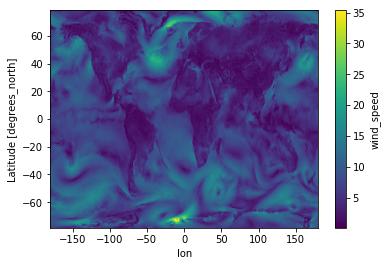

In [15]:
ds_ccmp['wind_speed'] = np.sqrt(ds_ccmp.uwnd**2 + ds_ccmp.vwnd**2)
day_ave = ds_ccmp.mean(dim='time')
day_ave.wind_speed.plot();

# 3. Selecting data with named dimensions

In xarray there are many different ways for selecting and indexing data.

### Positional indexing (old way)

This is the "old way", i.e. like ``numpy``:

In [16]:
ds_sst.analysed_sst[0, :, 900]  # note that the attributes, coordinates are preserved

<xarray.DataArray 'analysed_sst' (lat: 901)>
array([271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-11-01T12:00:00
  * lat      (lat) float32 -90.0 -89.8 -89.6 -89.4 ... 89.6 89.8 90.0
    lon      float32 0.0
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -200
    valid_max:      4000
    source:         EUR-L2P-ATS_NR_2P,NAVO-L2P-AVHRR18_G,NAVO-L2P-A...
    comment:        SST defined at all grid points but no physical ...

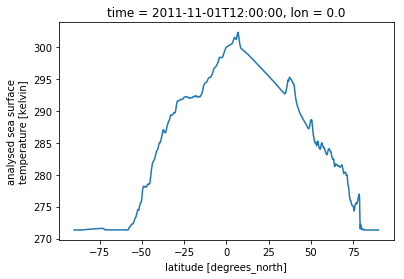

In [17]:
ds_sst.analysed_sst[0, :, 900].plot();

## There are different ways to select or mask data in xarray.  You can use .isel or .sel to select by coordinates, but if you want to select by a data variable you need to use .where

Let's try to select a region off the California coast, lat 20 to 50 and lon -140 to -110

In python, rather than saying >=lat1 and <=lat2 you can just use slice(lat1,lat2)

Try below to use .sel and lat=slice(lat1,lat2) to subset the data and then plot wind_speed


### Selection by index

Selection based on the **index** of a coordinate:

This selection implies prior knowledge about the structure of the data, and is therefore much less readable than the "xarray methods" presented below.

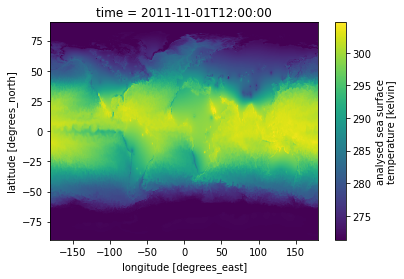

In [18]:
ds_sst.analysed_sst.isel(time=0).plot();  # like above, but with a dimension name this time

### Selection by value

Selection based on the **value** of a coordinate:

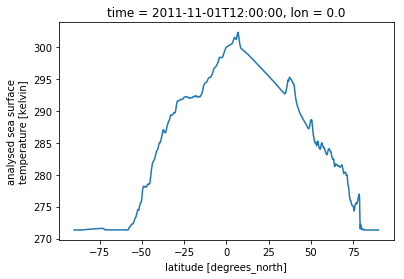

In [19]:
ds_sst.analysed_sst.sel(lon=0).plot(); 

### Selection by value works well for time, too

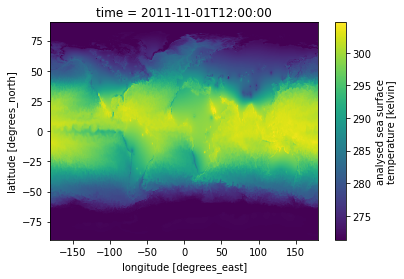

In [20]:
ds_sst.analysed_sst.sel(time='2011-11-01').plot();  # or look at a single timestep

### Selecting a range of values
The syntax is similar, but you'll need to use a [slice](https://docs.python.org/3/library/functions.html#slice):

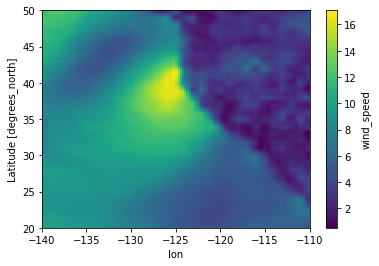

In [21]:
subset = day_ave.sel(lat=slice(20,50),lon=slice(-140,-110))
subset.wind_speed.plot()

### Nearest neighbor lookup

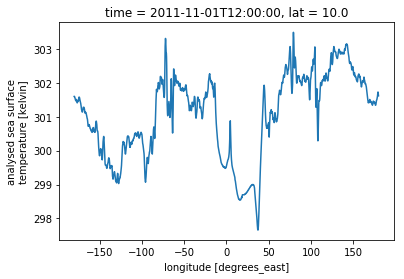

In [22]:
ds_sst.analysed_sst.sel(lat=10, method='nearest', tolerance=5).plot();

## Another way to select or mask your data, but based on data variables is to use [.where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html):   

Below, create a masked array using .where(day_ave.nobs>0) and then plot the wind speed

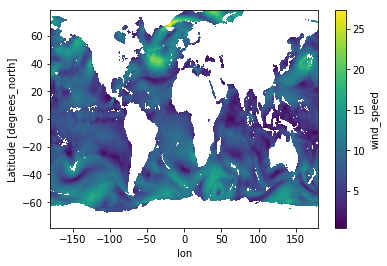

In [23]:
ds_ccmp_masked = day_ave.where(day_ave.nobs>0)
ds_ccmp_masked.wind_speed.plot()

## What if we want to look at two datasets together?

CMC SSTs are on a 0.2 deg grid, while CCMP winds are on a 0.25 deg grid

xarray provides [.interp](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.interp.html) and [.interp_like](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.interp_like.html) for interpolation of data

Let's start by interpolating the CCMP winds so that they are 'like' the CMC SSTs


In [24]:
ds_ccmp_interp = ds_ccmp.interp_like(ds_sst)
ds_ccmp_interp

<xarray.Dataset>
Dimensions:     (lat: 901, lon: 1800, time: 1)
Coordinates:
  * time        (time) datetime64[ns] 2011-11-01T12:00:00
  * lat         (lat) float64 -90.0 -89.8 -89.6 ... 89.6 89.8 90.0
  * lon         (lon) float64 -180.0 -179.8 -179.6 ... 179.6 179.8
Data variables:
    uwnd        (time, lat, lon) float64 nan nan nan ... nan nan nan
    vwnd        (time, lat, lon) float64 nan nan nan ... nan nan nan
    nobs        (time, lat, lon) float64 nan nan nan ... nan nan nan
    wind_speed  (time, lat, lon) float64 nan nan nan ... nan nan nan
Attributes:
    Conventions:                     COARDS
    title:                           Atlas FLK v1.1 derived surface...
    description:                     VAM 6-hour analyses starting f...
    history:                         Created by NASA Goddard Space ...
    base_date:                       [2011   11    1]
    DODS_EXTRA.Unlimited_Dimension:  time

## Now we can use the land mask from CMC data to mask the CCMP data using .where again

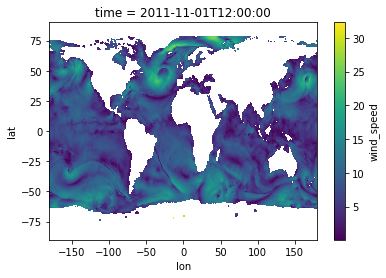

In [25]:
masked = ds_ccmp_interp.where(ds_sst.mask==1)
masked.wind_speed.plot()

## or to plot regions where the wind speed is low


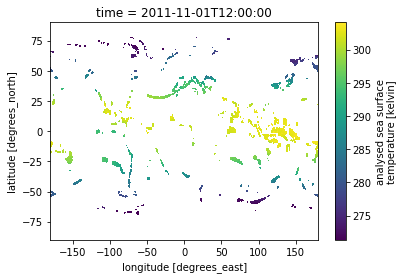

In [26]:
masked = ds_sst.where((ds_ccmp_interp.wind_speed<2) & (ds_sst.mask==1))
masked.analysed_sst.plot()

# 6. Graphics 

``xarray`` plotting functions rely on matplotlib internally, but they make use of all available metadata to make the plotting operations more intuitive and interpretable.

# Histogram and subplots

* Create a figure with two axes using fig, axes = plt.supblots(ncols=2)

* Plot the ocean winds histogram on the first axes using .plot.hist and the global land/ocean winds on the next


(array([3.401e+05, 5.917e+05, 6.096e+05, 5.864e+05, 5.518e+05, 4.014e+05,
        2.351e+05, 1.448e+05, 8.310e+04, 3.664e+04, 1.592e+04, 8.488e+03,
        4.833e+03, 3.440e+03, 1.520e+03, 9.690e+02, 6.240e+02, 3.730e+02,
        2.050e+02, 5.100e+01]),
 array([3.052e-03, 1.873e+00, 3.743e+00, 5.613e+00, 7.482e+00, 9.352e+00,
        1.122e+01, 1.309e+01, 1.496e+01, 1.683e+01, 1.870e+01, 2.057e+01,
        2.244e+01, 2.431e+01, 2.618e+01, 2.805e+01, 2.992e+01, 3.179e+01,
        3.366e+01, 3.553e+01, 3.740e+01], dtype=float32),
 <a list of 20 Patch objects>)

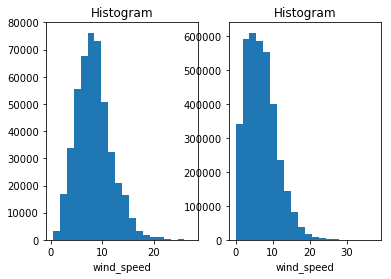

In [27]:
fig, axes = plt.subplots(ncols=2)
ds_ccmp_masked.wind_speed.plot.hist(bins=20,ax=axes[0])
ds_ccmp.wind_speed.plot.hist(bins=20,ax=axes[1])

## facet plot allows to do multiplot with the same color mappings

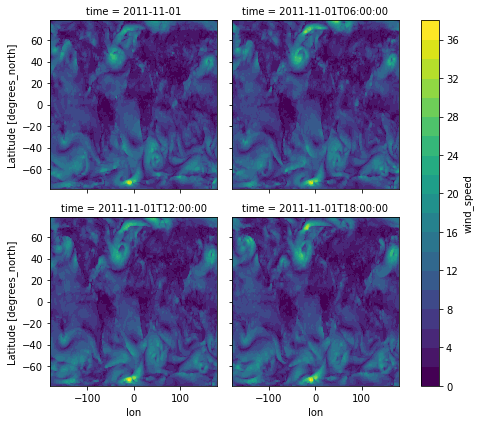

In [28]:
ds_ccmp.wind_speed.plot.contourf(x='lon', y='lat', col='time', col_wrap=2, levels=22);

### Plotting on maps

For plotting on maps, we rely on the excellent [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) library.

In [29]:
import cartopy.crs as ccrs

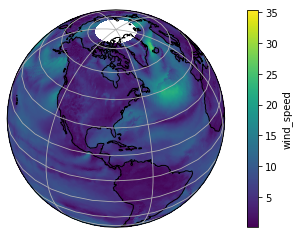

In [30]:
f = plt.figure(figsize=(8, 4))
# Define the map projection *on which* you want to plot
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
# ax is an empty plot. We now plot the variable t_average onto ax
# the keyword "transform" tells the function in which projection the air temp data is stored 
#ds_ccmp.wind_speed[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree())
day_ave.wind_speed.plot(ax=ax, transform=ccrs.PlateCarree())
# Add gridlines and coastlines to the plot
ax.coastlines(); ax.gridlines(); 

#### Facet plots on maps

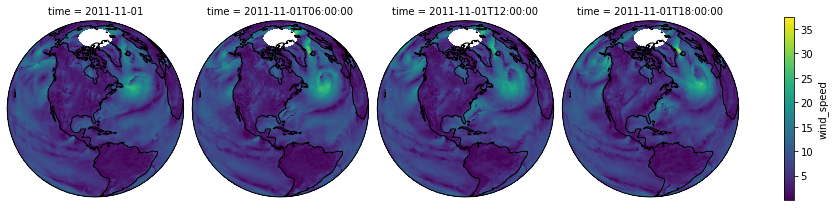

In [31]:
# this time we need to retrieve the plots to do things with the axes later on
#fig = plt.figure()
p = ds_ccmp.wind_speed.plot(x='lon', y='lat', col='time', transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.Orthographic(-80, 35)})
for ax in p.axes.flat:
    ax.coastlines()
fig_fname='./figures/ccmp_6hourly.png'
#p.savefig(fig_fname, transparent=False, format='png')
p.fig.savefig(fig_fname, format='png')

# 7. Collocate a Saildrone cruise with MUR SST data

### Let's open 2 months of 1 km MUR SST data

`xarray`can open multiple files at once using string pattern matching.  
  
  In this case we open all the files that match our `filestr`, i.e. all the files for the 2080s. 
  
  Each of these files (compressed) is approximately 800 MB.

In [32]:
from glob import glob
files = glob('F:/data/sst/jpl_mur/v4.1/2018/*/*',recursive=True)
files

['F:/data/sst/jpl_mur/v4.1/2018\\100\\20180410090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'F:/data/sst/jpl_mur/v4.1/2018\\101\\20180411090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'F:/data/sst/jpl_mur/v4.1/2018\\102\\20180412090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'F:/data/sst/jpl_mur/v4.1/2018\\103\\20180413090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'F:/data/sst/jpl_mur/v4.1/2018\\104\\20180414090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'F:/data/sst/jpl_mur/v4.1/2018\\105\\20180415090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'F:/data/sst/jpl_mur/v4.1/2018\\106\\20180416090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'F:/data/sst/jpl_mur/v4.1/2018\\107\\20180417090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'F:/data/sst/jpl_mur/v4.1/2018\\108\\20180418090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'F:/data/sst/jpl_mur/v4.1/2018\\109\\20180419090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv

In [33]:
ds_mur = xr.open_mfdataset(files,coords='minimal')
ds_mur

<xarray.Dataset>
Dimensions:           (lat: 17999, lon: 36000, time: 64)
Coordinates:
  * lat               (lat) float32 -89.99 -89.98 ... 89.98 89.99
  * lon               (lon) float32 -179.99 -179.98 ... 179.99 180.0
  * time              (time) datetime64[ns] 2018-04-10T09:00:00 ... 2018-06-12T09:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<shape=(64, 17999, 36000), chunksize=(1, 17999, 36000)>
    analysis_error    (time, lat, lon) float32 dask.array<shape=(64, 17999, 36000), chunksize=(1, 17999, 36000)>
    mask              (time, lat, lon) float32 dask.array<shape=(64, 17999, 36000), chunksize=(1, 17999, 36000)>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<shape=(64, 17999, 36000), chunksize=(1, 17999, 36000)>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<shape=(64, 17999, 36000), chunksize=(1, 17999, 36000)>
Attributes:
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Fin

`xarray` even puts them in the right order for you.

In [34]:
ds_mur.time

<xarray.DataArray 'time' (time: 64)>
array(['2018-04-10T09:00:00.000000000',
       '2018-04-11T09:00:00.000000000',
       '2018-04-12T09:00:00.000000000',
       '2018-04-13T09:00:00.000000000',
       '2018-04-14T09:00:00.000000000',
       '2018-04-15T09:00:00.000000000',
       '2018-04-16T09:00:00.000000000',
       '2018-04-17T09:00:00.000000000',
       '2018-04-18T09:00:00.000000000',
       '2018-04-19T09:00:00.000000000',
       '2018-04-20T09:00:00.000000000',
       '2018-04-21T09:00:00.000000000',
       '2018-04-22T09:00:00.000000000',
       '2018-04-23T09:00:00.000000000',
       '2018-04-24T09:00:00.000000000',
       '2018-04-25T09:00:00.000000000',
       '2018-04-26T09:00:00.000000000',
       '2018-04-27T09:00:00.000000000',
       '2018-04-28T09:00:00.000000000',
       '2018-04-29T09:00:00.000000000',
       '2018-04-30T09:00:00.000000000',
       '2018-05-01T09:00:00.000000000',
       '2018-05-02T09:00:00.000000000',
       '2018-05-03T09:00:00.000000000',
   

How big is all this data uncompressed? Will it fit into memory?

In [35]:
ds_mur.nbytes / 1e9  # Convert to gigiabytes

-35.519230532

# Collocating Saildrone cruise data with MUR SSTs 

* read in the Saildrone data 

In [36]:
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/hyrax/allData/insitu/L2/saildrone/Baja/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1.nc'
ds_usv = xr.open_dataset(url)
ds_usv.close()

## The NCEI trajectory format uses 'obs' as the coordinate.  This is an example of an 'older' style of data formatting that doesn't really mesh well with modern software capabilities. 

* So, let's change that by using [.swap_dims](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.swap_dims.html) 
* Another thing, latitude and longitude are just long and annoying, lets [.rename](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.rename.html) them to lat and lon

* Finally, the first and last part of the cruise the USV is being towed, so let's only include data from '2018-04-12T02' to '2018-06-10T18'


In [37]:
ds_usv = ds_usv.isel(trajectory=0).swap_dims({'obs':'time'}).rename({'longitude':'lon','latitude':'lat'})
ds_usv_subset = ds_usv.sel(time=slice('2018-04-12T02','2018-06-10T18')) #get rid of last part and first part where USV being towed


# Xarray interpolation won't run on chunked dimensions.  
1. First let's subset the data to make it smaller to deal with by using the cruise lat/lons

1. Now load the data into memory (de-Dask-ify) it  


In [38]:
#Step 1 from above
print('min max lat lon:', ds_usv_subset.lon.min().data,ds_usv_subset.lon.max().data,ds_usv_subset.lat.min().data,ds_usv_subset.lat.max().data)
subset = ds_mur.sel(lon=slice(ds_usv_subset.lon.min().data,ds_usv_subset.lon.max().data),
                    lat=slice(ds_usv_subset.lat.min().data,ds_usv_subset.lat.max().data))
#Step 2 from above
subset.load()

min max lat lon: -125.55297279999999 -115.5226624 28.0176832 37.6797408


<xarray.Dataset>
Dimensions:           (lat: 966, lon: 1003, time: 64)
Coordinates:
  * lat               (lat) float32 28.02 28.03 28.04 ... 37.66 37.67
  * lon               (lon) float32 -125.55 -125.54 ... -115.53
  * time              (time) datetime64[ns] 2018-04-10T09:00:00 ... 2018-06-12T09:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 292.223 292.211 ... nan
    analysis_error    (time, lat, lon) float32 0.38 0.38 ... nan nan
    mask              (time, lat, lon) float32 1.0 1.0 1.0 ... 2.0 2.0
    sea_ice_fraction  (time, lat, lon) float32 nan nan nan ... nan nan
    dt_1km_data       (time, lat, lon) timedelta64[ns] -1 days +01:00:00 ... NaT
Attributes:
    Conventions:                CF-1.5
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundatio...
    references:                 http://podaac.jpl.nasa.gov/Multi-sc...
    institution:                Jet Propulsion Laboratory
   

# Collocate USV data with MUR data
There are different options when you interpolate.  First, let's just do a linear interpolation

In [39]:
ds_collocated = subset.interp(lat=ds_usv_subset.lat,lon=ds_usv_subset.lon,time=ds_usv_subset.time,method='linear')

# Collocate USV data with MUR data
There are different options when you interpolate.  First, let's just do a nearest point rather than interpolate the data

In [40]:
ds_collocated_nearest = subset.interp(lat=ds_usv_subset.lat,lon=ds_usv_subset.lon,time=ds_usv_subset.time,method='nearest')

In [41]:
(ds_collocated_nearest.analysed_sst-273.15-ds_usv.TEMP_CTD_MEAN).mean()

<xarray.DataArray ()>
array(0.331507)
Coordinates:
    trajectory  float32 1002.0

In [42]:
(ds_collocated_nearest.analysed_sst-273.15-ds_usv.TEMP_CTD_MEAN).std()

<xarray.DataArray ()>
array(0.425322)
Coordinates:
    trajectory  float32 1002.0

# xarray can do more!

* concatentaion
* open network located files with openDAP
* import and export Pandas DataFrames
* .nc dump to 
* groupby_bins
* resampling and reduction

For more details, read this blog post: http://continuum.io/blog/xray-dask


In [43]:
#ds_collocated_nearest.to_netcdf('./data/new file.nc')